# Rastringin Function

$$f(x) = An + \sum_{i = 1}^{n} [x_i^2 + A \cos(2 \pi x_i)]$$
where $A = 10$ and $x_i \in [-5.12, 5.12]$ has lots of local minima and a global minimum at $x=0$.

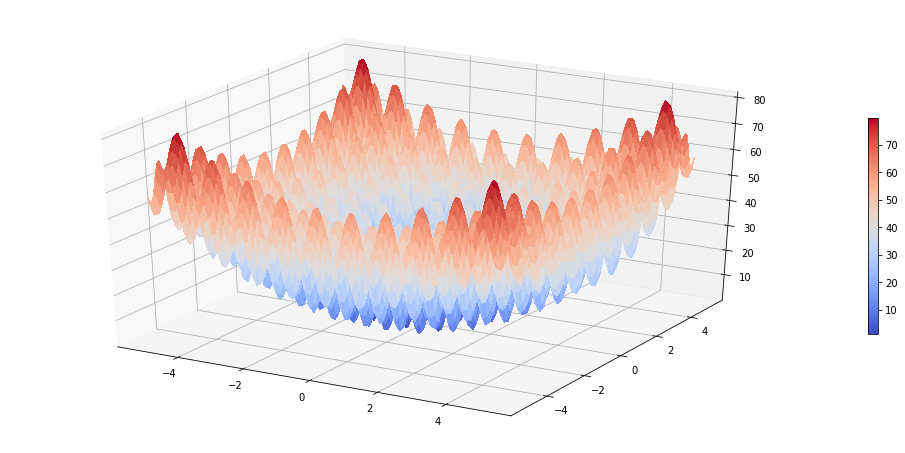

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def rastringin(x, y):
    return 10 * 2 + (np.square(x) - 10 * np.cos(2*np.pi*x))+(np.square(y) - 10 * np.cos(2*np.pi*y))

X, Y = np.meshgrid(np.linspace(-5.12, 5.12, 100), np.linspace(-5.12, 5.12, 100))
Z = rastringin(X, Y)
fig = plt.figure(figsize=(14,6))
ax = Axes3D(fig)
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

## Finding the minimum using SimulatedAnnealing

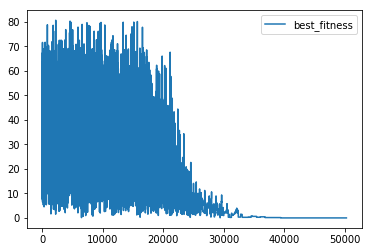

[0.00231654 0.01197457]
{'energy': 50259, 'alter': 50258, 'state changes': 18600}


In [14]:
import metapy as mp
import numpy as np
from metapy.algorithms import SimulatedAnnealing

class RastringinAnnealing(SimulatedAnnealing):
    def energy(self, state):
        return rastringin(state[0], state[1])
    
    def alter(self, state):
        return np.clip(state + np.random.randn(2), -5.12, 5.12)

ra = RastringinAnnealing()

ra.state = np.random.uniform(-5.12, 5.12, 2)
res = ra.optimize(max_time=10)
plt.plot(np.arange(0, len(res.best_progress)), res.best_progress, label="best_fitness")
plt.legend()
plt.show()
print(res.solution)
print(res.function_calls)